In [5]:
import pandas as pd
import string
from os import listdir
from sys import argv
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
translator = str.maketrans('', '', string.punctuation)
cs = ""
f_cs = [f for f in listdir('files_cs') if os.path.isfile(os.path.join('files_cs',f))]
files_cs= [ 'files_cs/'+f for f in f_cs if '.txt' in f]
docs_cs = []
for ff in files_cs:
    with open(ff,'r') as f:
        data = f.read()
        data = data.translate(translator)
        docs_cs.append(data)
        cs += " " + data

In [7]:
translator = str.maketrans('', '', string.punctuation)
ba = ""
f_ba = [f for f in listdir('files_ba') if os.path.isfile(os.path.join('files_ba',f))]
files_ba= [ 'files_ba/'+f for f in f_ba if '.txt' in f]
docs_ba = []
for ff in files_ba:
    with open(ff,'r') as f:
        data = f.read()
        data = data.translate(translator)
        docs_ba.append(data)
        ba += " " + data

In [8]:
cnt_cs = Counter(cs.split())

In [9]:
cnt_ba = Counter(ba.split())

In [10]:
ignore = ['the','a','if','in','it','of','or','for','and']
for word in list(cnt_cs):
    if word in ignore:
        del cnt_cs[word]
for word in list(cnt_ba):
    if word in ignore:
        del cnt_ba[word]

In [11]:
df_cs = pd.DataFrame(cnt_cs.most_common()[:30],columns=['word','count_cs'])
df_cs

,word,count_cs
0,data,42
1,systems,39
2,design,32
3,programming,21
4,game,19
5,information,19
6,computer,19
7,analysis,16
8,management,16
9,learning,15


In [12]:
df_ba = pd.DataFrame(cnt_ba.most_common()[:30],columns=['word','count_ba'])
df_ba

,word,count_ba
0,accounting,51
1,financial,40
2,tax,39
3,analysis,27
4,corporate,24
5,taxation,21
6,management,20
7,marketing,18
8,income,17
9,business,17


In [13]:
result = pd.merge(df_cs,df_ba,how='outer')
result = result.fillna(0)

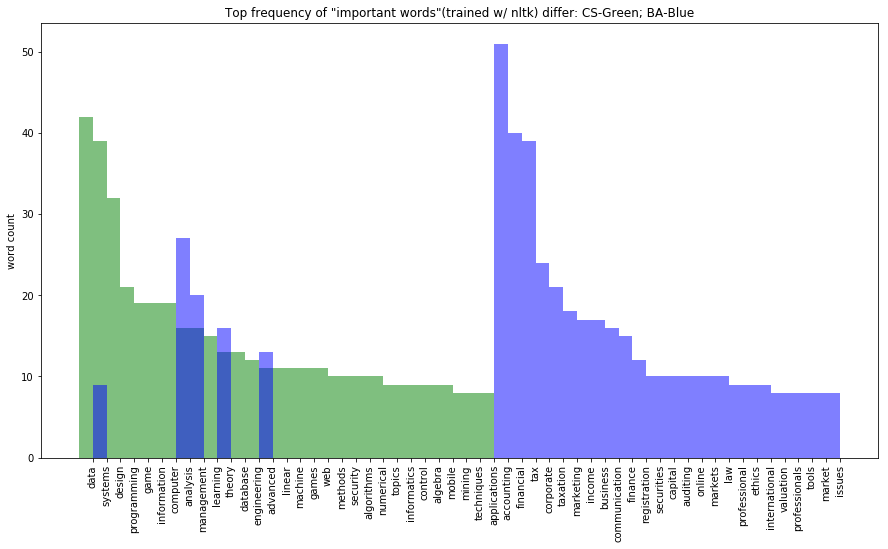

In [14]:
plt.figure(figsize=(15,8))

word = result.word
freq_cs = result.count_cs
freq_ba = result.count_ba

pos = np.arange(len(word))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(word)

plt.bar(pos, freq_cs, width, color='g',alpha=0.5)
plt.bar(pos, freq_ba, width, color='b',alpha=0.5)
ax.set(title='Top frequency of "important words"(trained w/ nltk) differ: CS-Green; BA-Blue', ylabel='word count')

plt.xticks(rotation=90)
plt.show()

In [17]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(docs_cs+docs_ba)  
word = vectorizer.get_feature_names()
from sklearn.feature_extraction.text import TfidfTransformer  
  
transformer = TfidfTransformer()   
tfidf = transformer.fit_transform(X)
weight=tfidf.toarray() 
for i in range(len(weight)):
    print(u"-------#",i," doc tf-idf weight------" )
    for j in range(len(word)):  
        print(word[j],weight[i][j])

-------# 0  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0.0
accountants 0.0
accounting 0.0
accrual 0.0
achieve 0.0
acquisitions 0.0
activity 0.0
adaptive 0.0
administration 0.0
administrative 0.0
advance 0.0
advanced 0.218984160087
advantage 0.0
advertising 0.0
aesthetic 0.0
aesthetics 0.0
affective 0.0
agency 0.0
aggregate 0.0
ai 0.0
algebra 0.0
algebraic 0.0
algorithm 0.0
algorithms 0.0
alignment 0.0
allocation 0.0
alternative 0.0
analyses 0.0
analysis 0.0833073534909
analytic 0.0
analytical 0.0
analytics 0.562701495989
analyzing 0.0
and 0.0
animation 0.0
animations 0.0
answering 0.0
application 0.0
applications 0.0
applicationsoriented 0.0
applied 0.0
apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.0
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking

algebra 0.0
algebraic 0.0
algorithm 0.0
algorithms 0.0
alignment 0.0
allocation 0.0
alternative 0.0
analyses 0.0
analysis 0.0
analytic 0.0
analytical 0.0
analytics 0.0
analyzing 0.0
and 0.0
animation 0.0
animations 0.0
answering 0.0
application 0.0
applications 0.0
applicationsoriented 0.0
applied 0.0
apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.0
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.0
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.0
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.0
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.0
challenges 0.0
change 0.0
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clientside 0.0
clientsservi

computation 0.0
computational 0.0
computer 0.0
computing 0.0
concept 0.0
concepts 0.0
conceptual 0.0
concurrency 0.0
conditional 0.0
configuration 0.0
conflicts 0.0
consequences 0.0
consider 0.0
considerations 0.0
consistency 0.0
console 0.0
consolidated 0.0
consolidations 0.0
constrained 0.0
constraints 0.0
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.155308300482
controlling 0.19497224065
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.0
cost 0.0
courses 0.0
coverage 0.0
crawling 0.0
creating 0.0
creation 0.0
creative 0.0
criteria 0.0
crossborder 0.0
cryptography 0.0
current 0.0
customer 0.0
custommade 0.0
cycle 0.0
data 0.0
database 0.0
databases 0.0
datadriven 0.0
dataflow 0.0
deadlock 0.0
deal 0.0
dealer 0.0
decedents 0.0
decision 0.0
decisionmaking 0.0
decisions 0.0
decomposition 0.0
deductions 0.0
defining 0.0
demand 0.0
density 0.0
depictions 0.0
design 0.0
designing 0.0


industry 0.0
industryrelated 0.0
inequality 0.0
inference 0.0
inflation 0.0
influencing 0.0
informatics 0.0
information 0.0
initial 0.0
innovation 0.0
input 0.0
insights 0.0
institutional 0.0
institutions 0.0
integration 0.0
integrity 0.0
intellectual 0.0
intelligence 0.0
intelligent 0.0
intensive 0.0
intentions 0.0
interactions 0.0
interactive 0.0
interest 0.0
interests 0.0
interface 0.0
interfaces 0.0
interfunctional 0.0
internal 0.0
international 0.0
internet 0.0
internship 0.0
interoperability 0.0
interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervention 0.0
introduction 0.0
introductory 0.0
intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
li

regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations 0.0
relationship 0.0
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0
reports 0.0
representation 0.0
requirements 0.0
research 0.0
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sentiment 0.0
series 0.0
serverside 0.0
services 0.0
sets 0.0
shading 0.0
shapesspatial 0.0
shareholders 0.0
sharing 0.0
shelters 0.0
simple 0.0
simulation 0.0
simulations 0.0
singular 0.0
skill 0.0
skills 0.0
smtechnical 0.0
social 0.0
societal 0.0
s

constraints 0.0
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.0
controlling 0.0
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.0
cost 0.0
courses 0.0
coverage 0.0
crawling 0.0
creating 0.0
creation 0.0
creative 0.0
criteria 0.0
crossborder 0.0
cryptography 0.0
current 0.0
customer 0.0
custommade 0.0
cycle 0.0
data 0.0
database 0.0
databases 0.0
datadriven 0.0
dataflow 0.0
deadlock 0.0
deal 0.0
dealer 0.0
decedents 0.0
decision 0.0
decisionmaking 0.0
decisions 0.0
decomposition 0.0
deductions 0.0
defining 0.0
demand 0.0
density 0.0
depictions 0.0
design 0.0
designing 0.592794414461
destroyed 0.0
detection 0.0
deterministic 0.0
developing 0.0
development 0.0
developments 0.0
devices 0.0
diagnostics 0.0
diagonalization 0.0
difference 0.0
differences 0.0
different 0.0
differential 0.0
digital 0.0
digitalcinema 0.0
diligence 0.0
directed 0.0
discovery 0.0
discrete 0.0
distributed 0.0


lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.146150603452
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 

sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.0
standard 0.0
standards 0.0
state 0.0
statement 0.0
statements 0.0
static 0.0
statistical 0.0
statistics 0.0
statutes 0.0
stereoscopicholographic 0.0
stochastic 0.0
stock 0.0
stocks 0.0
storage 0.0
store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0
synchronization 0.0
synthesizing 0.0
system 0.0
systems 0.0
tariffs 0.0
task 0.0
tax 0.0
taxation 0.0
taxes 0.0
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
t

competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
computation 0.0
computational 0.0
computer 0.0
computing 0.0
concept 0.0
concepts 0.0
conceptual 0.0
concurrency 0.0
conditional 0.0
configuration 0.0
conflicts 0.0
consequences 0.0
consider 0.0
considerations 0.0
consistency 0.0
console 0.0
consolidated 0.0
consolidations 0.0
constrained 0.0
constraints 0.0
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.0
controlling 0.0
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.0
cost 0.0
courses 0.0
coverage 0.0
crawling 0.0
creating 0.0
creation 0.0
creative 0.0
criteria 0.0
crossborder 0.0
cryptography 0.0
current 0.0
customer 0.0
custommade 0.0
cycle 0.0
data 0.452568331791
database 0.0
databases 0.0
datadriven 0.0
dataflow 0.0
deadlock 0.0
deal 0.0
dealer 0.0
decedents 0.0
decision 0.0
decisionmaking 0.0
decisions 0.0
decomposition 0.0
deductions 0.0
defini

hedging 0.0
high 0.344813450444
highperformance 0.172406725222
html 0.0
human 0.0
hypothesis 0.0
identification 0.0
identify 0.0
illustrations 0.0
images 0.0
imaging 0.0
immersive 0.149543316642
imperfect 0.0
implementable 0.0
implementation 0.0
implementing 0.0
implications 0.0
in 0.0
incentive 0.0
including 0.0
income 0.0
independent 0.0
index 0.0
indexes 0.0
indexing 0.0
individual 0.0
individuals 0.0
indoor 0.0
industry 0.0
industryrelated 0.0
inequality 0.0
inference 0.0
inflation 0.0
influencing 0.0
informatics 0.0
information 0.0
initial 0.0
innovation 0.0
input 0.0
insights 0.0
institutional 0.0
institutions 0.0
integration 0.0
integrity 0.0
intellectual 0.0
intelligence 0.0
intelligent 0.0
intensive 0.0
intentions 0.0
interactions 0.0
interactive 0.149543316642
interest 0.0
interests 0.0
interface 0.0
interfaces 0.0
interfunctional 0.0
internal 0.0
international 0.0
internet 0.0
internship 0.0
interoperability 0.0
interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervent

reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations 0.0
relationship 0.0
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0
reports 0.0
representation 0.0
requirements 0.0
research 0.634602681088
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sentiment 0.0
series 0.0
serverside 0.0
services 0.0
sets 0.0
shading 0.0
shapesspatial 0.0
shareholders 0.0
sharing 0.0
shelters 0.0
si

tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.173377975423
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 14  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0.0
accountants 0.0
accounting 0.0
accrual 0.0
achieve 0.0
acquisitions 0.0
activity 0.0
adaptive 0.0
administration 0.0
administrative 0.0
advance 0.0
advanced 0.0
advantage 0.0
advertising 0.0
aesthetic 0.0
aesthetics 0.0
affective 0.0
agency 0.0
aggregate 0.0
ai 0.0


fasmtax 0.0
fasmtaxation 0.0
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.0
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
forensic 0.0
forensics 0.0
form 0.0
formation 0.0
forms 0.0
foundations 0.0
fourier 0.0
functional 0.0
functions 0.0
fundamentals 0.0
funded 0.0
funds 0.0
futures 0.0
gaap 0.0
gains 0.0
game 0.0
games 0.0
gaussian 0.0
geographical 0.0
geometric 0.0
geospatial 0.0
getting 0.0
gift 0.0
gifts 0.0
goingconcern 0.0
goods 0.0
governance 0.0
govern

quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations 0.0
relationship 0.0
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0
reports 0.0
representation 0.0
requirements 0.0
research 0.0
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
search

consider 0.0
considerations 0.0
consistency 0.0
console 0.0
consolidated 0.0
consolidations 0.0
constrained 0.0
constraints 0.0
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.313297620577
controlling 0.0
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.0
cost 0.0
courses 0.0
coverage 0.0
crawling 0.0
creating 0.0
creation 0.0
creative 0.0
criteria 0.0
crossborder 0.0
cryptography 0.0
current 0.0
customer 0.0
custommade 0.0
cycle 0.0
data 0.12136709438
database 0.0
databases 0.0
datadriven 0.0
dataflow 0.0
deadlock 0.213193305907
deal 0.0
dealer 0.0
decedents 0.0
decision 0.0
decisionmaking 0.0
decisions 0.0
decomposition 0.0
deductions 0.0
defining 0.0
demand 0.0
density 0.0
depictions 0.0
design 0.0
designing 0.0
destroyed 0.0
detection 0.0
deterministic 0.0
developing 0.0
development 0.0
developments 0.0
devices 0.0
diagnostics 0.0
diagonalization 0.0
difference 0.0
differences 0.

medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.228726202252
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
pac

systems 0.28913003138
tariffs 0.0
task 0.0
tax 0.0
taxation 0.0
taxes 0.0
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0

faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.221881829537
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
forensic 0.0
forensics 0.0
form 0.0
formation 0.0
forms 0.0
foundations 0.0
fourier 0.0
functional 0.0
functions 0.0
fundamentals 0.0
funded 0.0
funds 0.0
futures 0.0
gaap 0.0
gains 0.0
game 0.307120694732
games 0.0
gaussian 0.0
geographical 0.0
geometric 0.0
geospatial 0.0
getting 0.0
gift 0.0
gifts 0.0
goingconcern 0.0
goods 0.0
governance 0.0
governing 0.0

organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
perspectives 0.0
physical 0.0
pipeline 0.0
pipelined 0.0
pitching 0.0
plan 0.0
planning 0.0
plans 0.0
platforms 0.0
play 0.0
poisson 0.0
policies 0.0
policy 0.0
politics 0.0
polynomial 0.0
poolingofinterests 0.0
populist 0.0
portfolio 0.0
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0

collection 0.0
colloquium 0.0
combinations 0.0
commodity 0.0
common 0.0
communicating 0.0
communication 0.0
companies 0.0
compensation 0.0
competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
computation 0.0
computational 0.0
computer 0.0
computing 0.0
concept 0.0
concepts 0.0
conceptual 0.0
concurrency 0.0
conditional 0.0
configuration 0.0
conflicts 0.0
consequences 0.0
consider 0.0
considerations 0.0
consistency 0.0
console 0.0
consolidated 0.0
consolidations 0.0
constrained 0.0
constraints 0.414640227863
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.152333343949
controlling 0.0
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.0
cost 0.0
courses 0.0
coverage 0.0
crawling 0.0
creating 0.0
creation 0.0
creative 0.0
criteria 0.0
crossborder 0.0
cryptography 0.0
current 0.0
customer 0.0
custommade 0.0
cycle 0.0
data 0.0
database 0.0
databases 0.0
datadriven

litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.192553443815
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.167018314291
matrix 0.167018314291
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.177616350592
methodologies 0.0
methods 0.129751538877
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
nat

techniques 0.0
technologies 0.345763208255
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.518644812382
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.218889275173
year 0.0
-------# 28  doc tf-idf weight------
2d 0.0
3d 0.0


financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
forensic 0.0
forensics 0.0
form 0.0
formation 0.0
forms 0.0
foundations 0.0
fourier 0.0
functional 0.0
functions 0.0
fundamentals 0.0
funded 0.0
funds 0.0
futures 0.0
gaap 0.0
gains 0.0
game 0.0
games 0.0
gaussian 0.0
geographical 0.0
geometric 0.0
geospatial 0.0
getting 0.0
gift 0.0
gifts 0.0
goingconcern 0.0
goods 0.0
governance 0.0
governing 0.0
government 0.0
gradient 0.0
graph 0.0
graphic 0.0
graphical 0.0
graphics 0.0
graphs 0.0
grounding 0.0
handson 0.0
hash 0.0
hedge 0.0
hedging 0.0
high 0.0
highperformance 0.0
html 0.0
human 0.0
hypothesis 0.0
identification 0.0
identify 0.0
illustrations 0.0
images 0.0
imaging 0.0
immersive 0.0
imperfect 0.0
implementable 0.0
implementation 0.0
implementing 0.0
implications 0.0
in 0.0
incentive 0.0
including 0.0
income 0.0
independent 0.0
index 0.0
indexes 0.0
indexing 0.0
individual 0.0
i

interface 0.0
interfaces 0.0
interfunctional 0.0
internal 0.0
international 0.0
internet 0.0
internship 0.0
interoperability 0.0
interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervention 0.0
introduction 0.0
introductory 0.0
intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.172415606098
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.158119074394
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.234651338789
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 

multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
per

reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations 0.0
relationship 0.0
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0
reports 0.0
representation 0.0
requirements 0.0
research 0.343104834206
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.595916576658
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
semi

simple 0.0
simulation 0.0
simulations 0.0
singular 0.0
skill 0.0
skills 0.0
smtechnical 0.0
social 0.0
societal 0.0
software 0.0
softwarehardware 0.0
solution 0.0
solutions 0.0
solve 0.0
sorting 0.0
sound 0.211551355638
sounds 0.0
source 0.0
sources 0.0
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0
spmarketing 0.0
spot 0.0
sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.0
standard 0.0
standards 0.0
state 0.0
statement 0.0
statements 0.0
static 0.0
statistical 0.0
statistics 0.0
statutes 0.0
stereoscopicholographic 0.0
stochastic 0.0
stock 0.0
stocks 0.0
storage 0.0
store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0


engines 0.0
ensure 0.0
enterprise 0.0
entities 0.0
entity 0.0
entityrelationship 0.0
entrepreneurial 0.0
environmental 0.0
environments 0.0
equality 0.0
equalization 0.0
equations 0.0
equity 0.0
er 0.0
error 0.0
errors 0.0
estate 0.0
estates 0.0
estimate 0.0
estimates 0.0
estimation 0.0
ethical 0.0
ethics 0.0
ethnic 0.0
evaluation 0.0
evidence 0.0
exceptions 0.0
exchange 0.0
exchanges 0.0
execution 0.0
executive 0.0
existing 0.0
expansion 0.0
expectation 0.0
experience 0.0
experiences 0.0
experimental 0.0
exploit 0.0
explore 0.0
expression 0.0
expressive 0.0
extendible 0.0
extensive 0.0
external 0.0
extraction 0.0
extrema 0.0
faa 0.0
faconditions 0.0
factor 0.0
factors 0.0
faeffective 0.0
fafederal 0.0
fagraphical 0.0
fainformation 0.0
fainternational 0.0
fair 0.0
famicroeconomic 0.0
family 0.0
farounding 0.0
fasmtax 0.0
fasmtaxation 0.0
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduct

pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
perspectives 0.0
physical 0.0
pipeline 0.0
pipelined 0.0
pitching 0.0
plan 0.0
planning 0.135699139309
plans 0.0
platforms 0.0
play 0.154807853027
poisson 0.0
policies 0.0
policy 0.0
politics 0.0
polynomial 0.0
poolingofinterests 0.0
populist 0.0
portfolio 0.0
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
program

assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.0
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.0
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.0
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.0
challenges 0.0
change 0.0
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clientside 0.0
clientsservices 0.0
cloud 0.0
coaching 0.0
code 0.0
cognitive 0.0
coherence 0.0
collection 0.0
colloquium 0.0
combinations 0.0
commodity 0.0
common 0.0
communicating 0.0
communication 0.0
companies 0.0
compensation 0.0
competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
computation 0.0
computational 0.0
computer 0.0
computing 0.0
concept 0.0
concepts 0.0
conceptual 0.0
concurrency 0.0
conditional 0.0
configuration 0.0
conflicts 0.0
consequences 0.0
consider

information 0.257936465745
initial 0.0
innovation 0.0
input 0.0
insights 0.0
institutional 0.0
institutions 0.0
integration 0.0
integrity 0.0
intellectual 0.0
intelligence 0.0
intelligent 0.0
intensive 0.0
intentions 0.0
interactions 0.0
interactive 0.17427601879
interest 0.0
interests 0.0
interface 0.0
interfaces 0.0
interfunctional 0.0
internal 0.0
international 0.0
internet 0.0
internship 0.0
interoperability 0.0
interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervention 0.0
introduction 0.0
introductory 0.0
intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage

plans 0.0
platforms 0.0
play 0.0
poisson 0.0
policies 0.0
policy 0.0
politics 0.0
polynomial 0.0
poolingofinterests 0.0
populist 0.0
portfolio 0.0
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
quer

common 0.0
communicating 0.0
communication 0.0
companies 0.0
compensation 0.0
competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
computation 0.0
computational 0.0
computer 0.0
computing 0.0
concept 0.0
concepts 0.0
conceptual 0.0
concurrency 0.0
conditional 0.0
configuration 0.0
conflicts 0.0
consequences 0.0
consider 0.0
considerations 0.0
consistency 0.0
console 0.0
consolidated 0.0
consolidations 0.0
constrained 0.0
constraints 0.0
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.0
controlling 0.0
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.0
cost 0.0
courses 0.0
coverage 0.0
crawling 0.0
creating 0.0
creation 0.0
creative 0.0
criteria 0.0
crossborder 0.0
cryptography 0.0
current 0.0
customer 0.0
custommade 0.0
cycle 0.0
data 0.0
database 0.0
databases 0.0
datadriven 0.0
dataflow 0.0
deadlock 0.0
deal 0.0
dealer 0.0
decedents 0.0
decision 0.0
decis

investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.438739674643
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.237818294907
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0


modeling 0.0
models 0.100065375113
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.152260195077
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
per

taxes 0.0
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.115920232245
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.146769205099
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 46 

cloud 0.0
coaching 0.0
code 0.0
cognitive 0.0
coherence 0.0
collection 0.0
colloquium 0.0
combinations 0.0
commodity 0.0
common 0.0
communicating 0.0
communication 0.0
companies 0.0
compensation 0.0
competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
computation 0.0
computational 0.0
computer 0.0
computing 0.448111312448
concept 0.0
concepts 0.0
conceptual 0.0
concurrency 0.0
conditional 0.0
configuration 0.0
conflicts 0.0
consequences 0.0
consider 0.0
considerations 0.0
consistency 0.0
console 0.0
consolidated 0.0
consolidations 0.0
constrained 0.0
constraints 0.0
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.0
controlling 0.0
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.0
cost 0.0
courses 0.0
coverage 0.0
crawling 0.0
creating 0.0
creation 0.0
creative 0.0
criteria 0.0
crossborder 0.0
cryptography 0.0
current 0.0
customer 0.0
custommade 0.0
cycle 0

internet 0.0
internship 0.0
interoperability 0.0
interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervention 0.0
introduction 0.0
introductory 0.0
intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.120356592468
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
ma

nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
perspectives 0.0
physical 0.0
pipeline 0.0
pipelined 0.0
pitching 0.0
plan 0.0
planning 0.0
plans 0.0
platforms 0.0
play 0.0
poisson 0.0
policies 0.0
policy 0.0
politics 0.0
polynomial 0.0
poolingofinterests 0.0
populist 0.0
portfolio 0.0
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
p

analytic 0.0
analytical 0.0
analytics 0.0
analyzing 0.0
and 0.123634423771
animation 0.637243982956
animations 0.0
answering 0.0
application 0.0
applications 0.0
applicationsoriented 0.0
applied 0.0
apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.0
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.0
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.0
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.125825902054
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.146952643961
central 0.0
challenges 0.0
change 0.0
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clientside 0.0
clientsservices 0.0
cloud 0.0
coaching 0.0
code 0.0
cognitive 0.0
coherence 0.0
collection 0.0

faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.0
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
forensic 0.0
forensics 0.0
form 0.0
formation 0.0
forms 0.0
foundations 0.0
fourier 0.0
functional 0.0
functions 0.0
fundamentals 0.0
funded 0.0
funds 0.0
futures 0.0
gaap 0.0
gains 0.0
game 0.450439686106
games 0.0
gaussian 0.0
geographical 0.0
geometric 0.0
geospatial 0.0
getting 0.0
gift 0.0
gifts 0.0
goingconcern 0.0
goods 0.0
governance 0.0
governing 0.0
government 0.0
gradient 0.0
graph 0.0
graphic 0.0
graphical 0.0
graphics 0.0
graphs 0.0
grounding 0.0
handson 0.0
hash 0.0
hedge 0.0
hedging 0.0
high 0.0
highperformance 0.0
html 0.0
human 0.0
hypothesis 0.0
identification 0.0
identify 0.0
illustrations 0.

outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
perspectives 0.0
physical 0.0
pipeline 0.0
pipelined 0.0
pitching 0.0
plan 0.0
planning 0.0
plans 0.0
platforms 0.0
play 0.0
poisson 0.0
policies 0.0
policy 0.0
politics 0.0
polynomial 0.0
poolingofinterests 0.0
populist 0.0
portfolio 0.0
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0

their 0.0
theorem 0.0
theoretical 0.0
theory 0.107840432361
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.398498600414
unconstrained 0.0
under 0.183792784277
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.199249300207
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 55  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0.0
accountants 0.0
accounting 0.0
accrual 0.0
achieve 0.0
acquisitions 0.0
activity 0.0
adaptive 

fagraphical 0.0
fainformation 0.0
fainternational 0.0
fair 0.0
famicroeconomic 0.0
family 0.0
farounding 0.0
fasmtax 0.0
fasmtaxation 0.0
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.0
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
forensic 0.0
forensics 0.0
form 0.0
formation 0.0
forms 0.0
foundations 0.0
fourier 0.0
functional 0.0
functions 0.0
fundamentals 0.0
funded 0.0
funds 0.0
futures 0.0
gaap 0.0
gains 0.0
game 0.0
games 0.0
gaussian 0.0
geographical 0.0

land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.164355834075
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.140056079596
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.151834447468
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.151834447468
mixing 0.0
mobile 0.0
model 0.

kinematics 0.0
knowledge 0.162603265872
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
m

smtechnical 0.0
social 0.0
societal 0.0
software 0.0
softwarehardware 0.0
solution 0.0
solutions 0.0
solve 0.0
sorting 0.0
sound 0.0
sounds 0.201080886235
source 0.0
sources 0.0
spaces 0.185482287303
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0
spmarketing 0.0
spot 0.0
sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.0
standard 0.0
standards 0.0
state 0.0
statement 0.0
statements 0.0
static 0.0
statistical 0.0
statistics 0.0
statutes 0.0
stereoscopicholographic 0.0
stochastic 0.0
stock 0.0
stocks 0.0
storage 0.0
store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0
synchronization 0.0
synthesizing 0.0
system 0.0
systems 0.0
tarif

apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.206657065695
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.0
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.0
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.0
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.0
challenges 0.0
change 0.0
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clientside 0.0
clientsservices 0.0
cloud 0.0
coaching 0.0
code 0.0
cognitive 0.0
coherence 0.0
collection 0.0
colloquium 0.0
combinations 0.0
commodity 0.0
common 0.0
communicating 0.0
communication 0.0
companies 0.0
compensation 0.0
competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
compu

expansion 0.0
expectation 0.0
experience 0.0
experiences 0.0
experimental 0.0
exploit 0.0
explore 0.0
expression 0.0
expressive 0.0
extendible 0.0
extensive 0.0
external 0.0
extraction 0.0
extrema 0.0
faa 0.0
faconditions 0.225664963532
factor 0.0
factors 0.0
faeffective 0.0
fafederal 0.0
fagraphical 0.0
fainformation 0.0
fainternational 0.0
fair 0.0
famicroeconomic 0.0
family 0.0
farounding 0.0
fasmtax 0.0
fasmtaxation 0.0
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.0
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusin

problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.420421854842
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.242349697842
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.242349697842
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations

algebraic 0.0
algorithm 0.0
algorithms 0.0
alignment 0.0
allocation 0.0
alternative 0.0
analyses 0.0
analysis 0.0
analytic 0.0
analytical 0.0
analytics 0.0
analyzing 0.0
and 0.0
animation 0.0
animations 0.0
answering 0.0
application 0.0
applications 0.0
applicationsoriented 0.0
applied 0.32166226674
apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.0
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.203631903963
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.0
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.0
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.203631903963
challenges 0.0
change 0.0
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clients

estimate 0.0
estimates 0.0
estimation 0.0
ethical 0.0
ethics 0.0
ethnic 0.0
evaluation 0.0
evidence 0.0
exceptions 0.0
exchange 0.0
exchanges 0.0
execution 0.0
executive 0.0
existing 0.0
expansion 0.0
expectation 0.0
experience 0.0
experiences 0.0
experimental 0.0
exploit 0.0
explore 0.0
expression 0.0
expressive 0.0
extendible 0.0
extensive 0.0
external 0.0
extraction 0.0
extrema 0.0
faa 0.0
faconditions 0.0
factor 0.0
factors 0.0
faeffective 0.0
fafederal 0.0
fagraphical 0.0
fainformation 0.0
fainternational 0.0
fair 0.0
famicroeconomic 0.0
family 0.0
farounding 0.0
fasmtax 0.0
fasmtaxation 0.0
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.210150610374
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation

error 0.0
errors 0.0
estate 0.0
estates 0.0
estimate 0.0
estimates 0.0
estimation 0.0
ethical 0.0
ethics 0.0
ethnic 0.0
evaluation 0.0
evidence 0.0
exceptions 0.0
exchange 0.0
exchanges 0.0
execution 0.0
executive 0.0
existing 0.0
expansion 0.0
expectation 0.0
experience 0.0
experiences 0.0
experimental 0.0
exploit 0.0
explore 0.0
expression 0.0
expressive 0.0
extendible 0.0
extensive 0.0
external 0.0
extraction 0.0
extrema 0.0
faa 0.0
faconditions 0.0
factor 0.0
factors 0.0
faeffective 0.0
fafederal 0.0
fagraphical 0.0
fainformation 0.0
fainternational 0.0
fair 0.0
famicroeconomic 0.0
family 0.0
farounding 0.0
fasmtax 0.0
fasmtaxation 0.0
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.207005903232
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0

knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.187503250405
law 0.0
laws 0.0
layout 0.0
learning 0.252696963528
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.123227105267
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.27554487207
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.187503250405
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.4

mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.373713030742
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.202570683465
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0


practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0

practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.110030462131
professionals 0.23869279962
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing

program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations 0.0
relationship 0.0
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0
reports 0.0
representation 0.0
requirements 0.0
research 0.0
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.

quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations 0.0
relationship 0.240723119295
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0
reports 0.0
representation 0.0
requirements 0.0
research 0.0
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
sco

plans 0.0
platforms 0.0
play 0.0
poisson 0.0
policies 0.0
policy 0.0
politics 0.0
polynomial 0.0
poolingofinterests 0.0
populist 0.0
portfolio 0.0
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
quer

mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
or

mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
or

realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.0
relating 0.0
relational 0.0
relations 0.0
relationship 0.0
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0
reports 0.0
representation 0.0
requirements 0.0
research 0.0
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sen

advertising 0.0
aesthetic 0.0
aesthetics 0.0
affective 0.0
agency 0.0
aggregate 0.0
ai 0.0
algebra 0.0
algebraic 0.0
algorithm 0.0
algorithms 0.0
alignment 0.0
allocation 0.0
alternative 0.0
analyses 0.0
analysis 0.0
analytic 0.0
analytical 0.0
analytics 0.0
analyzing 0.0
and 0.159812591477
animation 0.0
animations 0.0
answering 0.0
application 0.0
applications 0.0
applicationsoriented 0.0
applied 0.0
apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.0
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.0
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.135336450789
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.0
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.0
challenges 

independent 0.0
index 0.0
indexes 0.0
indexing 0.0
individual 0.0
individuals 0.0
indoor 0.0
industry 0.0
industryrelated 0.0
inequality 0.0
inference 0.0
inflation 0.0
influencing 0.0
informatics 0.0
information 0.0
initial 0.0
innovation 0.0
input 0.0
insights 0.0
institutional 0.0
institutions 0.0
integration 0.0
integrity 0.0
intellectual 0.0
intelligence 0.0
intelligent 0.0
intensive 0.0
intentions 0.0
interactions 0.0
interactive 0.0
interest 0.0
interests 0.0
interface 0.0
interfaces 0.0
interfunctional 0.0
internal 0.0
international 0.266456501503
internet 0.0
internship 0.0
interoperability 0.0
interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervention 0.0
introduction 0.0
introductory 0.0
intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 

mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
per

natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
perspectives 0.0
physical 0.0
pipeline 0.0
pipelined 0.0
pitching 0.0
plan 0.0
planning 0.0
plans 0.0
platforms 0.0
play 0.0
poisson 0.0
policies 0.

privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.232856098052
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.214792576698
regulations 0.0
regulatory 0.0
re

sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.0
standard 0.0
standards 0.0
state 0.0
statement 0.0
statements 0.0
static 0.0
statistical 0.0
statistics 0.0
statutes 0.0
stereoscopicholographic 0.0
stochastic 0.0
stock 0.0
stocks 0.0
storage 0.0
store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0
synchronization 0.0
synthesizing 0.0
system 0.0
systems 0.0
tariffs 0.0
task 0.0
tax 0.0
taxation 0.0
taxes 0.0
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.441868511166
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0


divisions 0.0
do 0.0
documentation 0.0
domestic 0.0
drm 0.0
due 0.0
duplicates 0.0
dynamic 0.0
dynamics 0.0
econometric 0.0
econometrics 0.0
economic 0.0
economics 0.0
econtracts 0.0
effect 0.0
effective 0.0
effects 0.0
efficiency 0.0
eigenvalue 0.0
electrical 0.0
electronic 0.0
elimination 0.0
emerging 0.0
emotion 0.0
emotional 0.0
emphasis 0.0
empirical 0.0
engineering 0.0
engines 0.0
ensure 0.0
enterprise 0.0
entities 0.0
entity 0.0
entityrelationship 0.0
entrepreneurial 0.0
environmental 0.0
environments 0.0
equality 0.0
equalization 0.0
equations 0.0
equity 0.0
er 0.0
error 0.0
errors 0.0
estate 0.0
estates 0.0
estimate 0.0
estimates 0.0
estimation 0.0
ethical 0.0
ethics 0.0
ethnic 0.0
evaluation 0.0
evidence 0.0
exceptions 0.0
exchange 0.0
exchanges 0.0
execution 0.0
executive 0.0
existing 0.0
expansion 0.0
expectation 0.0
experience 0.0
experiences 0.0
experimental 0.0
exploit 0.0
explore 0.0
expression 0.0
expressive 0.0
extendible 0.0
extensive 0.0
external 0.0
extraction 0.0


mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.135044493123
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payou

source 0.0
sources 0.0
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0
spmarketing 0.0
spot 0.0
sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.0
standard 0.0
standards 0.0
state 0.0
statement 0.0
statements 0.0
static 0.0
statistical 0.0
statistics 0.0
statutes 0.0
stereoscopicholographic 0.0
stochastic 0.0
stock 0.0
stocks 0.0
storage 0.0
store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0
synchronization 0.0
synthesizing 0.0
system 0.0
systems 0.0
tariffs 0.0
task 0.0
tax 0.534816987929
taxation 0.0
taxes 0.0
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminol

destroyed 0.0
detection 0.0
deterministic 0.0
developing 0.0
development 0.0
developments 0.0
devices 0.0
diagnostics 0.0
diagonalization 0.0
difference 0.0
differences 0.0
different 0.0
differential 0.0
digital 0.0
digitalcinema 0.0
diligence 0.0
directed 0.0
discovery 0.0
discrete 0.0
distributed 0.0
distribution 0.0
distributions 0.175176318569
diversity 0.0
divisions 0.0
do 0.0
documentation 0.0
domestic 0.0
drm 0.0
due 0.0
duplicates 0.0
dynamic 0.0
dynamics 0.0
econometric 0.0
econometrics 0.0
economic 0.0
economics 0.0
econtracts 0.0
effect 0.164723874426
effective 0.0
effects 0.0
efficiency 0.0
eigenvalue 0.0
electrical 0.0
electronic 0.0
elimination 0.0
emerging 0.0
emotion 0.0
emotional 0.0
emphasis 0.0
empirical 0.0
engineering 0.0
engines 0.0
ensure 0.0
enterprise 0.0
entities 0.0
entity 0.0
entityrelationship 0.0
entrepreneurial 0.0
environmental 0.0
environments 0.0
equality 0.0
equalization 0.0
equations 0.0
equity 0.0
er 0.0
error 0.0
errors 0.0
estate 0.0
estates 0.0
e

microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.197789253223
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
pa

store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0
synchronization 0.0
synthesizing 0.0
system 0.0
systems 0.0
tariffs 0.0
task 0.0
tax 0.331483487781
taxation 0.1223631503
taxes 0.157212119133
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
u

digitalcinema 0.0
diligence 0.0
directed 0.0
discovery 0.0
discrete 0.0
distributed 0.0
distribution 0.0
distributions 0.0
diversity 0.0
divisions 0.0
do 0.0
documentation 0.0
domestic 0.0
drm 0.0
due 0.0
duplicates 0.0
dynamic 0.0
dynamics 0.0
econometric 0.0
econometrics 0.0
economic 0.0
economics 0.0
econtracts 0.0
effect 0.0
effective 0.0
effects 0.0
efficiency 0.0
eigenvalue 0.0
electrical 0.0
electronic 0.0
elimination 0.0
emerging 0.0
emotion 0.0
emotional 0.0
emphasis 0.0
empirical 0.0
engineering 0.0
engines 0.0
ensure 0.0
enterprise 0.0
entities 0.0
entity 0.0
entityrelationship 0.0
entrepreneurial 0.0
environmental 0.0
environments 0.0
equality 0.0
equalization 0.0
equations 0.0
equity 0.0
er 0.0
error 0.0
errors 0.0
estate 0.0
estates 0.0
estimate 0.0
estimates 0.0
estimation 0.0
ethical 0.0
ethics 0.0
ethnic 0.0
evaluation 0.0
evidence 0.0
exceptions 0.0
exchange 0.0
exchanges 0.0
execution 0.0
executive 0.0
existing 0.0
expansion 0.0
expectation 0.0
experience 0.0
experie

matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.252234254466
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.221537208446
or 0.0
ordering 0.0
ordinary 0.0
organizatio

populist 0.0
portfolio 0.528603170917
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
price 0.0
pricing 0.0
principles 0.0
privacy 0.0
private 0.0
probabilistic 0.0
probability 0.0
problem 0.0
problems 0.0
procedural 0.0
procedure 0.0
procedures 0.0
process 0.0
processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
rea

responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sentiment 0.0
series 0.0
serverside 0.0
services 0.0
sets 0.0
shading 0.0
shapesspatial 0.0
shareholders 0.0
sharing 0.0
shelters 0.0
simple 0.0
simulation 0.0
simulations 0.0
singular 0.0
skill 0.0
skills 0.0
smtechnical 0.0
social 0.157784863916
societal 0.0
software 0.0
softwarehardware 0.0
solution 0.0
solutions 0.0
solve 0.0
sorting 0.0
sound 0.0
sounds 0.0
source 0.0
sources 0.0
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0

stocks 0.0
storage 0.0
store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0
synchronization 0.0
synthesizing 0.0
system 0.0
systems 0.0
tariffs 0.0
task 0.0
tax 0.145982895621
taxation 0.0
taxes 0.0
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.

apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.0
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.0
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.0
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.0
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.0
challenges 0.0
change 0.0
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clientside 0.0
clientsservices 0.0
cloud 0.0
coaching 0.0
code 0.0
cognitive 0.0
coherence 0.0
collection 0.0
colloquium 0.0
combinations 0.0
commodity 0.0
common 0.0
communicating 0.0
communication 0.0
companies 0.154370136776
compensation 0.0
competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
compu

decedents 0.0
decision 0.0
decisionmaking 0.0
decisions 0.0
decomposition 0.0
deductions 0.0
defining 0.0
demand 0.0
density 0.0
depictions 0.0
design 0.0
designing 0.0
destroyed 0.0
detection 0.0
deterministic 0.0
developing 0.0
development 0.0
developments 0.0
devices 0.0
diagnostics 0.0
diagonalization 0.0
difference 0.0
differences 0.0
different 0.0
differential 0.0
digital 0.0
digitalcinema 0.0
diligence 0.0
directed 0.0
discovery 0.0
discrete 0.0
distributed 0.0
distribution 0.0
distributions 0.0
diversity 0.0
divisions 0.0
do 0.0
documentation 0.0
domestic 0.0
drm 0.0
due 0.0
duplicates 0.0
dynamic 0.0
dynamics 0.0
econometric 0.0
econometrics 0.0
economic 0.0
economics 0.0
econtracts 0.0
effect 0.0
effective 0.0
effects 0.0
efficiency 0.0
eigenvalue 0.0
electrical 0.0
electronic 0.0
elimination 0.0
emerging 0.0
emotion 0.0
emotional 0.0
emphasis 0.0
empirical 0.0
engineering 0.0
engines 0.0
ensure 0.0
enterprise 0.0
entities 0.0
entity 0.0
entityrelationship 0.0
entrepreneurial

faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.189078637222
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.0
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
forensic 0.0
forensics 0.0
form 0.0
formation 0.0
forms 0.0
foundations 0.0
fourier 0.0
functional 0.0
functions 0.0
fundamentals 0.0
funded 0.0
funds 0.0
futures 0.0
gaap 0.0
gains 0.0
game 0.0
games 0.0
gaussian 0.0
geographical 0.0
geometric 0.0
geospatial 0.0
getting 0.0
gift 0.0
gifts 0.0
goingconcern 0.0
goods 0.0
governance 0.0
governing 0.0
government 0.0
gradient 0.0
graph 0.0
graphic 0.0
graphical 0.0
graphics 0.0
graphs 0.0
grounding 0.0
handson 0.189078637222
hash 0.0
hedge 0.0
hed

interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervention 0.0
introduction 0.0
introductory 0.0
intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathemat

operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.130550794066
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
perspectives 0.0
physical 0.0
pipeline 0.0
pipelined 0.0
pitching 0.0
plan 0.0
planning 0.0
plans 0.0
platforms 0.0
play 0.0
poisson 0.0
policies 0.0
policy 0.0
politics 0.0
polynomial 0.0
poolingofinterests 0.0
populist 0.0
portfolio 0.0
postmerger 0.0
postproduction 0.0
practical 0.0
practice 0.0
practices 0.0
practicum 0.0
pragmatic 0.0
preliminary 0.0
premia 0.0
preparing 0.0
presentation 0.0
presentations 0.0
preservation 0.0
preserve 0.0
pri

representation 0.0
requirements 0.0
research 0.0
residential 0.0
response 0.0
responsibilities 0.0
responsibility 0.0
responsive 0.0
restriction 0.0
results 0.0
retrieval 0.0
returns 0.0
revenue 0.0
reviewing 0.0
rights 0.0
risk 0.0
ritz 0.0
robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sentiment 0.0
series 0.0
serverside 0.0
services 0.0
sets 0.0
shading 0.0
shapesspatial 0.0
shareholders 0.0
sharing 0.0
shelters 0.0
simple 0.0
simulation 0.0
simulations 0.0
singular 0.0
skill 0.0
skills 0.0
smtechnical 0.0
social 0.0
societal 0.0
software 0.0
softwarehardware 0.0
solution 0.0
solutions 0.0
solve 0.0
sorting 0.0
sound 0.0
sounds 0.0
source 0.0
sources 0.0
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
s

topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 107  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0.0
accountants 0.0
accounting 0.0
accrual 0.0
achieve 0.0
acquisitions 0.0
activity 0.0
adaptive 0.0
administration 0.0
administrative 0.0
advance 0.0
advanced 0.0
advantage 0.0
advertising 0.0
aesthetic 0.0
aesthetics 0.0
affective 0.0
agency 0.0
aggregate 0.0
ai 0.0
algebra 0.0
algebraic 0.0
algo

techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminology 0.0
terms 0.0
test 0.0
testing 0.0
texturing 0.0
the 0.0
their 0.0
theorem 0.0
theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.249348382469
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 108  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0

source 0.0
sources 0.0
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0
spmarketing 0.0
spot 0.0
sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.0
standard 0.0
standards 0.0
state 0.0
statement 0.0
statements 0.0
static 0.0
statistical 0.0
statistics 0.0
statutes 0.0
stereoscopicholographic 0.0
stochastic 0.0
stock 0.0
stocks 0.0
storage 0.0
store 0.0
stores 0.0
strategic 0.0
strategies 0.0
strategy 0.0
streaming 0.0
structure 0.0
structures 0.0
structuring 0.0
studies 0.0
study 0.0
subchapter 0.0
subject 0.0
supervised 0.0
supervision 0.0
supply 0.0
support 0.0
swarms 0.0
symbolic 0.0
synchronization 0.0
synthesizing 0.0
system 0.0
systems 0.0
tariffs 0.0
task 0.0
tax 0.0
taxation 0.0
taxes 0.0
taxpayer 0.0
teamwork 0.0
technical 0.0
techniques 0.0
technologies 0.0
technology 0.0
temporal 0.0
terminology 0.0
ter

under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 110  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0.0
accountants 0.0
accounting 0.0
accrual 0.0
achieve 0.0
acquisitions 0.0
activity 0.0
adaptive 0.0
administration 0.0
administrative 0.0
advance 0.0
advanced 0.0
advantage 0.0
advertising 0.0
aesthetic 0.0
aesthetics 0.0
affective 0.0
agency 0.0
aggregate 0.0
ai 0.0
algebra 0.0
algebraic 0.0
algorithm 0.0
algorithms 0.0
alignment 0.0
allocation 0.0
alternative 0.0
analyses 0.0
analysis 0.0
analytic 0.0
analytical 0.0
analytics 0.0
analyzing 0.0
and 0.0
anima

experimental 0.0
exploit 0.0
explore 0.0
expression 0.0
expressive 0.0
extendible 0.0
extensive 0.0
external 0.0
extraction 0.0
extrema 0.0
faa 0.0
faconditions 0.0
factor 0.0
factors 0.0
faeffective 0.0
fafederal 0.0
fagraphical 0.0
fainformation 0.0
fainternational 0.0
fair 0.0
famicroeconomic 0.0
family 0.0
farounding 0.0
fasmtax 0.0
fasmtaxation 0.0
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.192038496873
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.0
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
foren

lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multist

processes 0.0
processing 0.0
processors 0.0
product 0.0
production 0.0
products 0.0
professional 0.0
professionals 0.0
profitability 0.0
profits 0.0
program 0.0
programmable 0.0
programming 0.0
project 0.0
projections 0.0
projectpresentation 0.0
projects 0.0
property 0.0
proportions 0.0
protocol 0.0
prototyping 0.0
psychological 0.0
public 0.0
purchase 0.0
purposes 0.0
python 0.0
quadratic 0.0
quadratures 0.0
quality 0.0
quantitative 0.0
queries 0.0
query 0.0
querying 0.0
question 0.0
questions 0.0
random 0.0
range 0.0
rastorization 0.0
rates 0.0
real 0.0
reality 0.0
realtime 0.0
realworld 0.0
reasoning 0.0
recognition 0.0
recognizing 0.0
recommendation 0.0
reconcile 0.0
record 0.0
recovery 0.0
recursion 0.0
reduce 0.0
reengineering 0.0
refined 0.0
registration 0.0
regression 0.0
regulation 0.0
regulations 0.0
regulatory 0.0
related 0.184225472579
relating 0.0
relational 0.0
relations 0.0
relationship 0.0
relationships 0.0
reliability 0.0
rendering 0.0
reorganizations 0.0
reporting 0.0

capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.0
challenges 0.0
change 0.201076907674
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clientside 0.0
clientsservices 0.0
cloud 0.0
coaching 0.0
code 0.0
cognitive 0.0
coherence 0.0
collection 0.0
colloquium 0.0
combinations 0.0
commodity 0.0
common 0.0
communicating 0.0
communication 0.0
companies 0.0
compensation 0.0
competing 0.0
competition 0.0
compilation 0.0
comprehensive 0.0
compression 0.0
computation 0.0
computational 0.0
computer 0.0
computing 0.0
concept 0.0
concepts 0.0
conceptual 0.0
concurrency 0.0
conditional 0.0
configuration 0.0
conflicts 0.0
consequences 0.0
consider 0.0
considerations 0.0
consistency 0.0
console 0.0
consolidated 0.0
consolidations 0.0
constrained 0.0
constraints 0.0
construction 0.0
consulting 0.0
consumer 0.0
content 0.0
contest 0.0
contractive 0.0
contracts 0.0
control 0.0
controlling 0.0
coordinated 0.0
coordinating 0.0
copyright 0.0
corporate 0.0
corporation 0.0
corporations 0.

intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.180456321842
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mech

multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.407652537879
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
peripheral 0.0
perl 0.0
permutations 0.0
persistence 0.0
personnel 0.0
persons 0.0
perspective 0.0
perspectives 0.0
physical 0.0
pipeline 0.0
pipelined 0.0
pitching 0.0
plan 0.0
planning 0.0
plans 0.0


robot 0.0
robotic 0.0
robotics 0.0
robots 0.0
role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sentiment 0.0
series 0.0
serverside 0.0
services 0.0
sets 0.0
shading 0.0
shapesspatial 0.0
shareholders 0.0
sharing 0.0
shelters 0.0
simple 0.0
simulation 0.0
simulations 0.0
singular 0.0
skill 0.0
skills 0.0
smtechnical 0.0
social 0.0
societal 0.0
software 0.0
softwarehardware 0.0
solution 0.0
solutions 0.0
solve 0.0
sorting 0.0
sound 0.0
sounds 0.0
source 0.0
sources 0.0
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0
spmarketing 0.0
spot 0.0
sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 

applications 0.0
applicationsoriented 0.0
applied 0.0
apply 0.0
approach 0.0
approaches 0.0
approximation 0.0
architecting 0.0
architecture 0.0
architectures 0.0
arithmetic 0.0
artificial 0.0
assessment 0.0
asset 0.0
assets 0.0
assurance 0.0
assure 0.0
attached 0.0
audiences 0.0
audio 0.0
auditing 0.0
auditor 0.0
authentication 0.0
authorization 0.0
behavior 0.0
benchmarking 0.0
best 0.0
big 0.0
binomial 0.0
bioinspired 0.0
bme 0.0
btree 0.0
budgeting 0.0
building 0.0
business 0.0
businesses 0.0
buyouts 0.0
cache 0.0
caging 0.0
calculus 0.0
canonical 0.0
capabilities 0.0
capital 0.0
case 0.0
cash 0.0
cc 0.0
central 0.0
challenges 0.0
change 0.0
character 0.0
characters 0.0
citizens 0.0
class 0.0
classification 0.0
clientside 0.0
clientsservices 0.0
cloud 0.0
coaching 0.0
code 0.0
cognitive 0.0
coherence 0.0
collection 0.0
colloquium 0.0
combinations 0.0
commodity 0.0
common 0.0
communicating 0.0
communication 0.0
companies 0.0
compensation 0.0
competing 0.0
competition 0.0
compilation 

java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.575524689284
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.143881172321
life 0.0
lifetime 0.0
lighting 0.0
limit 0.0
limited 0.0
linear 0.0
linkage 0.0
linking 0.0
liquidations 0.0
liquidity 0.0
litigation 0.0
llcs 0.0
llps 0.0
local 0.0
logic 0.0
logical 0.0
logicbased 0.0
machine 0.0
macroeconometric 0.0
macroeconomic 0.0
maintenance 0.0
making 0.0
management 0.0
managerial 0.0
managers 0.0
managing 0.0
manipulate 0.0
map 0.0
mappings 0.0
mapreduce 0.0
market 0.0
marketing 0.0
marketingrelated 0.0
markets 0.0
markov 0.0
massivescale 0.0
materials 0.0
mathematical 0.0
mathematics 0.0
matrices 0.0
matrix 0.0
matter 0.0
measurement 0.0
mechanics 0.0
mechanisms 0.0
media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
m

media 0.0
medical 0.0
memory 0.0
mergers 0.0
method 0.0
methodologies 0.0
methods 0.0
microcomputers 0.0
microeconomic 0.0
microeconomics 0.0
mining 0.0
mitigation 0.0
mixing 0.0
mobile 0.0
model 0.0
modeling 0.0
models 0.0
modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
pack

theoretical 0.0
theory 0.0
therapeutics 0.0
thread 0.0
threat 0.0
time 0.0
timeseries 0.0
timing 0.0
to 0.0
tool 0.0
tools 0.0
topic 0.0
topics 0.0
topology 0.0
torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.0
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 124  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0.0
accountants 0.0
accounting 0.0
accrual 0.0
achieve 0.0
acquisitions 0.0
activity 0.0
adaptive 0.0
administration 0.0
administrative 0.0
advance 0.0
advanced 0.

famicroeconomic 0.0
family 0.0
farounding 0.0
fasmtax 0.0
fasmtaxation 0.208350232588
faspadvanced 0.0
faspan 0.0
faspanalysis 0.0
faspapplications 0.0
faspconcepts 0.0
faspexamination 0.0
faspfunction 0.0
faspinternal 0.0
faspintroduction 0.0
faspnew 0.0
faspoptimize 0.0
fasppractical 0.0
faspsmapplication 0.0
faspsmbusiness 0.0
faspsmconcepts 0.0
faspsmdesigning 0.0
faspsmfoundational 0.0
faspsmmodern 0.0
faspsmtaxation 0.0
fasptaxation 0.0
faspthis 0.0
favaluation 0.0
feasibility 0.0
federal 0.0
feedback 0.0
field 0.0
file 0.0
final 0.0
finance 0.0
financial 0.0
financing 0.0
finite 0.0
firm 0.0
firms 0.0
fixed 0.0
flow 0.0
flowthrough 0.0
focusing 0.0
following 0.0
for 0.0
forecasting 0.0
foreign 0.0
forensic 0.0
forensics 0.0
form 0.0
formation 0.0
forms 0.0
foundations 0.0
fourier 0.0
functional 0.0
functions 0.0
fundamentals 0.0
funded 0.0
funds 0.0
futures 0.0
gaap 0.0
gains 0.19218772318
game 0.0
games 0.0
gaussian 0.0
geographical 0.0
geometric 0.0
geospatial 0.0
getting 0.0


inflation 0.0
influencing 0.0
informatics 0.0
information 0.0
initial 0.0
innovation 0.0
input 0.0
insights 0.0
institutional 0.0
institutions 0.0
integration 0.0
integrity 0.0
intellectual 0.0
intelligence 0.0
intelligent 0.0
intensive 0.0
intentions 0.0
interactions 0.0
interactive 0.0
interest 0.0
interests 0.0
interface 0.0
interfaces 0.0
interfunctional 0.0
internal 0.0
international 0.0
internet 0.0
internship 0.0
interoperability 0.0
interpersonal 0.0
interpretation 0.0
interpreting 0.0
intervention 0.0
introduction 0.0
introductory 0.0
intrusion 0.0
investigative 0.0
investment 0.0
involving 0.0
ipadpsvita 0.0
issuance 0.0
issues 0.0
iteration 0.0
iterative 0.0
java 0.0
javascript 0.0
jordon 0.0
judgmental 0.0
judicial 0.0
kinematics 0.0
knowledge 0.0
labs 0.0
lagrange 0.0
land 0.0
language 0.0
languages 0.0
large 0.0
law 0.0
laws 0.0
layout 0.0
learning 0.0
leastsquares 0.0
levels 0.0
leveraged 0.0
leveraging 0.0
liability 0.0
life 0.0
lifetime 0.17536759037
lighting 0.0
limit

role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sentiment 0.0
series 0.0
serverside 0.0
services 0.0
sets 0.0
shading 0.0
shapesspatial 0.0
shareholders 0.0
sharing 0.0
shelters 0.0
simple 0.0
simulation 0.0
simulations 0.0
singular 0.0
skill 0.0
skills 0.0
smtechnical 0.0
social 0.0
societal 0.0
software 0.0
softwarehardware 0.0
solution 0.0
solutions 0.0
solve 0.0
sorting 0.0
sound 0.0
sounds 0.0
source 0.0
sources 0.0
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0
spmarketing 0.0
spot 0.0
sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.215331908531
standard 0.0
standards 0.0
stat

data 0.0
database 0.0
databases 0.0
datadriven 0.0
dataflow 0.0
deadlock 0.0
deal 0.0
dealer 0.0
decedents 0.0
decision 0.0
decisionmaking 0.0
decisions 0.0
decomposition 0.0
deductions 0.0
defining 0.0
demand 0.0
density 0.0
depictions 0.0
design 0.0
designing 0.0
destroyed 0.0
detection 0.0
deterministic 0.0
developing 0.0
development 0.0
developments 0.0
devices 0.0
diagnostics 0.0
diagonalization 0.0
difference 0.0
differences 0.0
different 0.0
differential 0.0
digital 0.0
digitalcinema 0.0
diligence 0.0
directed 0.0
discovery 0.0
discrete 0.0
distributed 0.0
distribution 0.0
distributions 0.0
diversity 0.0
divisions 0.230682213313
do 0.0
documentation 0.0
domestic 0.0
drm 0.0
due 0.0
duplicates 0.0
dynamic 0.0
dynamics 0.0
econometric 0.0
econometrics 0.0
economic 0.0
economics 0.0
econtracts 0.0
effect 0.0
effective 0.0
effects 0.0
efficiency 0.0
eigenvalue 0.0
electrical 0.0
electronic 0.0
elimination 0.0
emerging 0.0
emotion 0.0
emotional 0.0
emphasis 0.0
empirical 0.0
engineer

modern 0.0
monetary 0.0
money 0.0
monitoring 0.0
mortgagebacked 0.0
mortgages 0.0
multicore 0.0
multidatabase 0.0
multimedia 0.0
multimodal 0.0
multiplayer 0.0
multipliers 0.0
multiscale 0.0
multistate 0.0
multithreaded 0.0
multivariate 0.0
natural 0.0
naturallanguage 0.0
necessary 0.0
needed 0.0
negotiations 0.0
network 0.0
networked 0.0
networking 0.0
networks 0.0
newton 0.0
nonlinear 0.0
nonrelational 0.0
normal 0.0
numerical 0.0
objectoriented 0.0
objectrelational 0.0
obligations 0.0
of 0.0
offcampus 0.0
offerings 0.0
on 0.0
online 0.0
open 0.0
operating 0.0
operation 0.0
operations 0.0
optimality 0.0
optimization 0.0
optimum 0.0
options 0.0
or 0.0
ordering 0.0
ordinary 0.0
organization 0.0
organizations 0.0
original 0.0
other 0.0
outdoor 0.0
outoforder 0.0
packaged 0.0
packages 0.0
paradigm 0.0
parameter 0.0
partial 0.0
partner 0.0
partnership 0.0
partnerships 0.0
pattern 0.0
patterns 0.0
pay 0.0
payments 0.0
payout 0.0
penalty 0.0
perception 0.0
perfect 0.0
performance 0.0
periph

torts 0.0
trade 0.0
trading 0.0
transactions 0.0
transform 0.0
transformations 0.0
translation 0.0
ucc 0.0
uncertainty 0.0
unconstrained 0.0
under 0.0
undergraduate 0.0
underlying 0.0
understanding 0.0
undirected 0.0
unions 0.0
urban 0.0
use 0.0
used 0.0
user 0.0
usercamera 0.0
valuation 0.0
value 0.0
variables 0.0
vectors 0.0
venture 0.0
versions 0.0
very 0.0
view 0.0
virtual 0.0
virtualaugmented 0.0
visual 0.0
visualization 0.0
visualizations 0.0
volatility 0.0
weak 0.0
wealth 0.0
web 0.0
website 0.205891667682
welfare 0.0
wide 0.0
work 0.0
workshop 0.0
wrapper 0.0
writing 0.0
written 0.0
xml 0.0
year 0.0
-------# 132  doc tf-idf weight------
2d 0.0
3d 0.0
academia 0.0
access 0.0
accountants 0.0
accounting 0.109521107591
accrual 0.0
achieve 0.0
acquisitions 0.0
activity 0.0
adaptive 0.0
administration 0.0
administrative 0.0
advance 0.0
advanced 0.0
advantage 0.0
advertising 0.0
aesthetic 0.0
aesthetics 0.0
affective 0.0
agency 0.0
aggregate 0.0
ai 0.0
algebra 0.0
algebraic 0.0
algori

geographical 0.0
geometric 0.0
geospatial 0.0
getting 0.0
gift 0.0
gifts 0.0
goingconcern 0.0
goods 0.0
governance 0.0
governing 0.0
government 0.0
gradient 0.0
graph 0.0
graphic 0.0
graphical 0.0
graphics 0.0
graphs 0.0
grounding 0.0
handson 0.0
hash 0.0
hedge 0.0
hedging 0.0
high 0.0
highperformance 0.0
html 0.0
human 0.0
hypothesis 0.0
identification 0.0
identify 0.0
illustrations 0.0
images 0.0
imaging 0.0
immersive 0.0
imperfect 0.0
implementable 0.0
implementation 0.0
implementing 0.0
implications 0.0
in 0.0
incentive 0.0
including 0.0
income 0.0
independent 0.0
index 0.0
indexes 0.0
indexing 0.0
individual 0.0
individuals 0.0
indoor 0.0
industry 0.0
industryrelated 0.0
inequality 0.0
inference 0.0
inflation 0.0
influencing 0.0
informatics 0.0
information 0.0
initial 0.0
innovation 0.0
input 0.0
insights 0.0
institutional 0.0
institutions 0.0
integration 0.0
integrity 0.0
intellectual 0.0
intelligence 0.0
intelligent 0.0
intensive 0.0
intentions 0.0
interactions 0.0
interactive 0

role 0.0
rulings 0.0
sales 0.0
saving 0.0
scale 0.0
scheduling 0.0
schematic 0.0
science 0.0
scorps 0.0
scripting 0.0
search 0.0
searching 0.0
secure 0.0
securities 0.0
security 0.0
selected 0.0
selfassembly 0.0
selforganization 0.0
semantic 0.0
seminar 0.0
sensor 0.0
sensors 0.0
sentiment 0.0
series 0.0
serverside 0.0
services 0.0
sets 0.0
shading 0.0
shapesspatial 0.0
shareholders 0.0
sharing 0.0
shelters 0.0
simple 0.0
simulation 0.0
simulations 0.0
singular 0.0
skill 0.0
skills 0.0
smtechnical 0.0
social 0.0
societal 0.0
software 0.0
softwarehardware 0.0
solution 0.0
solutions 0.0
solve 0.0
sorting 0.0
sound 0.0
sounds 0.0
source 0.0
sources 0.148646049424
spaces 0.0
spadvanced 0.0
spanalysis 0.0
spatial 0.0
spcomparative 0.0
special 0.0
specialization 0.0
speconomic 0.0
speculation 0.0
speculative 0.0
splinear 0.0
spmarketing 0.0
spot 0.0
sppractical 0.0
spsmapplication 0.0
spsmtax 0.0
sql 0.0
sql3 0.0
stability 0.0
stabilization 0.0
stakeholder 0.0
standard 0.0
standards 0.0
stat

In [20]:
for i in range(len(tfidf.toarray())):
    for j in range(len(tfidf.toarray())):
        if i < j:
            sim = cosine_similarity(tfidf[i],tfidf[j])
            if sim > 0.6:
                print(i,j,sim,"\n",(docs_cs+docs_ba)[i],'--\n',(docs_cs+docs_ba)[j])

1 8 [[ 0.85225266]] 
 special
topics
special
topics
informatics
 --
 special
topics
special
topics
computer
science

12 49 [[ 1.]] 
 directed
research
directed
research
 --
 directed
research
directed
research

34 48 [[ 0.67810198]] 
 numerical
analysis
numerical
analysis
linear
algebra
solution
nonlinear
systems
equations
approximation
theory
functional
analysis
numerical
solution
ordinary
partial
differential
equations
 --
 numerical
methods
numerical
methods
farounding
errors
digital
computation
solution
linear
algebraic
systems
newton’s
method
nonlinear
systems
matrix
polynomial
approximation
numerical
integration
numerical
solution
ordinary
differential
equations

77 116 [[ 0.61246277]] 
 writing
for
accounting
and
tax
professionals
writing
for
accounting
and
tax
professionals
faeffective
written
communication
accounting
tax
professionals
accounting
taxation
 --
 communication
for
accounting
and
tax
professionals
communication
for
accounting
and
tax
professionals
ensure
effective


In [26]:
f_ba = [f for f in listdir('BA') if os.path.isfile(os.path.join('BA',f))]
files_ba= [ 'BA/'+f for f in f_ba if '.txt' in f]
for ff in files_ba:
    with open(ff,'r') as f:
        print(ff)
        data = f.read()
        print(data)

BA/FBE 533.txt
      FBE 533  CEO Pay , Corporate Governance , and the Politics of Finance           [ Print Course ]   FBE 533 CEO Pay , Corporate Governance , and the Politics of Finance          Units : 3Terms Offered : SpExplores how value is created (or destroyed) in organizations , focusing on compensation and incentive systems and the causes and consequences of government (and populist) intervention . Prerequisite : GSBA 521b Â or GSBA 548  .                 Instruction Mode : Lecture Grading Option : Letter        
BA/GSBA 542.txt
      GSBA 542 Communication for Management           [ Print Course ]   GSBA 542 Communication for Management          Units : 1 .5Terms Offered : FaInternal and external communication , research methods , reports for decision-making , oral presentations and briefings , strategies to assure communication; field studies .                 Duplicates Credit in GSBA 502 , GSBA 523 , GSBA 523TÂ and the former GSBA 502ab .  Instruction Mode : Lecture Gradi

### plot entity similarity with graphviz tool
### results observed by calculation/filtering above (finding cosine sim > 0.6)
graph { 
 
		"CSCI 599 Special Topics\nCourse content to be selected each semester\n from recent developments in computer science." -- "INF 599 Special Topics\nCourse content to be selected each semester\n from recent developments in informatics."[label="sim=0.85",weight="0.85"]; 
		"MATH 502 Numerical Analysis\nComputational linear algebra;\n solution of general\n nonlinear systems of equations;\n approximation theory using functional analysis;\n numerical solution of ordinary and partial differential equations ." -- "MATH 458 Numerical Methods\nRounding errors in digital computation;\n solution of linear algebraic systems;\n Newton’s method for nonlinear systems;\n matrix eigenvalues; polynomial approximation; numerical integration;\n numerical solution of ordinary differential equations."[label="sim=0.68",weight="0.68"]; 
                "BUCO 504T Writing for Accounting and Tax Professionals\nEffective written communication for accounting and tax professionals."--"GSBA 523T Communication for Accounting and Tax Professionals\nCommunication strategies to ensure effective communication to \ninternal and external business audiences at all levels;\n business writing and presentations; electronic communication;\n communicating ethics in business . Open only to accounting,\n business taxation , law/business , and taxation majors."[label="sim=0.61",weight="0.61"]
	}